# Data Preprocessing

### Import useful libraries, some of them should be pip in the current environment (terminal).

In [1]:
import re  # regular expression

import pandas as pd  # pip 
import emoji  # pip; turn the emoji into general english words
import pysenti  # pip install PySentiStrength; automatically add emotion scores for reviews

from langdetect import detect  # pip; Google's language detection tool
from tqdm import tqdm  # pip; progress bar
import matplotlib.pyplot as plt  # pip

### Function Abstraction: the common patterns were extracted to avoid code redundancy and verbosity, increasing code reusability.

In [2]:
def view_data(data):
    print("The shape of data: ", data.shape)
    print("The first 20 rows: \n", data.head(20))


def check_NaN(data):
    print("Checking NaN......")
    nan_exist = data.isna().any(axis=0).any()  # output of "data.isna().any(axis=0)"  might be  "content: True; score: False"
    
    if nan_exist:
        nan_rows = data[data.isna().any(axis=1)]  # rows
        amount = len(nan_rows) # how many NaN review rows the data had

        print("The NaN rows: \n{}\n\nThe number of rows with NaN: {}".format(nan_rows, amount))

        print("Deleting......")
        data.dropna(axis=0, inplace=True)  # drop the rows containing NaN
        print("These rows with NaN had been removed!")
        
    else:
        print("No NaN data detected")


def turn_emoji_into_word(review):
    return emoji.demojize(review)  # turn the emoji into general english words


def remove_useless_char(review):
    review = re.sub(r'[^a-zA-Z0-9\.,\'\s]', ' ', review)  # keep words+numbers and several special symbols, reducing the difficulty of manually checking
    review = re.sub(r'[\s]+', ' ', review)  # avoid long spacing  ### "r" for symbol "\"
    review = review.strip()  # format adjustment
    return review


def is_english(review):
    try:
        return detect(review) == "en"  # Google's language detection tool; "en" meant english language
    except:
        return False


def simple_warning_check(data):
    warning_amount = (data["warn"].str.contains("warning").sum())  # how many "warning" tags the data had
    print("warning amount:", warning_amount)
    print("data amount:", len(data))
    warning_ratio = warning_amount / len(data)  # print the ratio of "warning" tags
    print("The warning ratio was:", warning_ratio)


def draw_distribution(data):
    # draw a bar chart to describe the emotion label distribution based on the SentiStrength api
    positive_amount = data[data["emotion_label"] == "positive"].shape[0]
    neutral_amount = data[data["emotion_label"] == "neutral"].shape[0]
    negative_amount = data[data["emotion_label"] == "negative"].shape[0]
    
    plt.figure(figsize=(8, 6))
    bars = plt.bar(["Positive", "Neutral", "Negative"], [positive_amount, neutral_amount, negative_amount], color=["green", "blue", "red"])
    plt.title("Emotion Label Distribution based on SentiStrength api")
    plt.xticks(["Positive", "Neutral", "Negative"])
    plt.xlabel("Categories of reviews")
    plt.ylabel("Amount")
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha="center", va="bottom")  # show exact digits
    plt.show()

### Read the raw data.

In [3]:
data_path = "./data/kaggle_data_0128.csv"  # Note: this dataset was published on January 28th, 2024
raw_data = pd.read_csv(data_path, encoding = "utf-8")
view_data(raw_data)

The shape of data:  (200000, 4)
The first 20 rows: 
                                 reviewId  \
0   c7813790-f22a-439c-be23-f8159e134e0e   
1   200df44c-cd5a-452c-a461-6d67a432f942   
2   2779a1b2-71bc-4e21-9afb-bc2bd7347330   
3   474f7829-54c1-46e0-86b0-917f4fc2cbc4   
4   c7f0963c-0e4b-43f0-be11-9b12d4aaaf72   
5   17fa5327-ac66-42da-969b-7abacf2af98d   
6   dce195ca-3244-410b-b21d-62fb66946989   
7   e90d3b5b-3255-4c00-b7e9-2ac813478fdf   
8   04b4ce8a-6e97-4f64-84c8-7cd5d2deae2e   
9   2b52db84-33b2-4e32-a3d3-f4f614e22cdb   
10  7d30f7e6-4f4b-441b-acb5-ce7371b04878   
11  7929ca4b-6483-4db3-9b79-dd49444643fc   
12  1d8ecd49-eb54-4afe-ab62-a4dff4b6424c   
13  435ff887-2fbd-445f-bf2a-2507dccd1dff   
14  8df99483-054f-416e-8a78-aff303da02c6   
15  1b1432db-34c2-4805-b0be-52296aa9388c   
16  138a5d58-6059-4dd5-9414-357c3f0d2c27   
17  4f82e620-a154-4fae-8d7f-5638e86b1327   
18  ba5519e2-711b-42ce-b302-b346ff8473d2   
19  e377f9a1-71f3-4bf9-9cf3-2b42443bb750   

                      

In [4]:
example_path = "./data/kaggle_data_0128.xlsx"  # Microsoft Excel file
example = pd.read_excel(example_path)
view_data(example)  # bad choice, since the emoji information was probably lost

The shape of data:  (200000, 4)
The first 20 rows: 
                                 reviewId  \
0   c7813790-f22a-439c-be23-f8159e134e0e   
1   200df44c-cd5a-452c-a461-6d67a432f942   
2   2779a1b2-71bc-4e21-9afb-bc2bd7347330   
3   474f7829-54c1-46e0-86b0-917f4fc2cbc4   
4   c7f0963c-0e4b-43f0-be11-9b12d4aaaf72   
5   17fa5327-ac66-42da-969b-7abacf2af98d   
6   dce195ca-3244-410b-b21d-62fb66946989   
7   e90d3b5b-3255-4c00-b7e9-2ac813478fdf   
8   04b4ce8a-6e97-4f64-84c8-7cd5d2deae2e   
9   2b52db84-33b2-4e32-a3d3-f4f614e22cdb   
10  7d30f7e6-4f4b-441b-acb5-ce7371b04878   
11  7929ca4b-6483-4db3-9b79-dd49444643fc   
12  1d8ecd49-eb54-4afe-ab62-a4dff4b6424c   
13  435ff887-2fbd-445f-bf2a-2507dccd1dff   
14  8df99483-054f-416e-8a78-aff303da02c6   
15  1b1432db-34c2-4805-b0be-52296aa9388c   
16  138a5d58-6059-4dd5-9414-357c3f0d2c27   
17  4f82e620-a154-4fae-8d7f-5638e86b1327   
18  ba5519e2-711b-42ce-b302-b346ff8473d2   
19  e377f9a1-71f3-4bf9-9cf3-2b42443bb750   

                      

### Drop useless columns.

In [5]:
raw_data.drop(["reviewId", "app"], axis = 1, inplace = True)  # drop the abstract id and app name, avoiding possible bias
view_data(raw_data)

The shape of data:  (200000, 2)
The first 20 rows: 
                                               content  score
0                   Great Awesome Wonderful Beautiful      5
1                                        king label❤❤      5
2                                                nice      5
3                                            Good app      5
4                                              Nice 👍      5
5                                     Please am sorry      5
6                                                  Ok      5
7                                                Nice      5
8                                            Rabiulsk      5
9                                            G coycgc      5
10                                            CRICKET      1
11  -200 ⭐s because some jackapple has most likely...      1
12                                               Nice      5
13                                                 ❤️      5
14  Se demora muchísimo tiempo e

### Check and drop NaN values.

In [6]:
check_NaN(raw_data)
print("")
check_NaN(raw_data)
print("")
view_data(raw_data)

Checking NaN......
The NaN rows: 
       content  score
1863       NaN      4
12175      NaN      5
14361      NaN      2
27243      NaN      4
41049      NaN      3
49372      NaN      5
57945      NaN      4
64165      NaN      5
68814      NaN      4
76358      NaN      4
85962      NaN      4
97185      NaN      3
98617      NaN      5
99481      NaN      5
100549     NaN      5
130957     NaN      4
132086     NaN      4
136544     NaN      1
137259     NaN      1
143847     NaN      5
155115     NaN      5
156829     NaN      5
163969     NaN      3
169567     NaN      5
183745     NaN      5
189352     NaN      5
193045     NaN      5
195016     NaN      2
195481     NaN      5

The number of rows with NaN: 29
Deleting......
These rows with NaN had been removed!

Checking NaN......
No NaN data detected

The shape of data:  (199971, 2)
The first 20 rows: 
                                               content  score
0                   Great Awesome Wonderful Beautiful      5
1  

### Drop possibly duplicate data and only keep the first one if duplicate was detected.

In [7]:
# for example, observe the "Nice" review in both output[6] and output[7]
raw_data.drop_duplicates(subset = ["content"], keep = "first", inplace = True)
view_data(raw_data)

The shape of data:  (136110, 2)
The first 20 rows: 
                                               content  score
0                   Great Awesome Wonderful Beautiful      5
1                                        king label❤❤      5
2                                                nice      5
3                                            Good app      5
4                                              Nice 👍      5
5                                     Please am sorry      5
6                                                  Ok      5
7                                                Nice      5
8                                            Rabiulsk      5
9                                            G coycgc      5
10                                            CRICKET      1
11  -200 ⭐s because some jackapple has most likely...      1
13                                                 ❤️      5
14  Se demora muchísimo tiempo en cargar la página...      1
15                       Freezin

### Basic data preprocessing.

In [8]:
# apply the pre-defined functions, to turn the emoji into words and remove useless characters
raw_data["content"] = raw_data["content"].astype(str).apply(turn_emoji_into_word)  
raw_data["content"] = raw_data["content"].apply(remove_useless_char)

# lowercase
raw_data["content"] = raw_data["content"].str.lower()  

# check the null value further
raw_data = raw_data[~(raw_data["content"].str.isspace() | (raw_data["content"] == ""))]
check_NaN(raw_data)

view_data(raw_data)

Checking NaN......
No NaN data detected
The shape of data:  (133070, 2)
The first 20 rows: 
                                               content  score
0                   great awesome wonderful beautiful      5
1                      king label red heart red heart      5
2                                                nice      5
3                                            good app      5
4                                      nice thumbs up      5
5                                     please am sorry      5
6                                                  ok      5
7                                                nice      5
8                                            rabiulsk      5
9                                            g coycgc      5
10                                            cricket      1
11  200 star s because some jackapple has most lik...      1
13                                          red heart      5
14  se demora much simo tiempo en cargar la p gina...

### Length detection and interception.

In [9]:
minimum_length = 8
raw_data["length"] = raw_data["content"].str.split(r'\s+').apply(len)  # how many "words" did one sentence hold
raw_data = raw_data[(raw_data["length"] >= minimum_length)]  # only consider those sentences, which had eight or more "words"

In [10]:
view_data(raw_data)

The shape of data:  (67314, 3)
The first 20 rows: 
                                               content  score  length
11  200 star s because some jackapple has most lik...      1      56
14  se demora much simo tiempo en cargar la p gina...      1      15
19  if your believe you facebook account has been ...      1      25
21  remove my information by other phone or comput...      5      11
35  my facebook id used to have many likes and com...      5      23
36  lots of ads sponsered show and scammer, when b...      1      19
42  in case you thought about it, don't pay for me...      1      30
43  5 stars had to use fake name, but real one was...      1      41
45  please bring back the old facebook, i badly wa...      3      13
46                  i see facebook as one of the best      5       8
48  fesbook my febright app hundred points thumbs ...      5      14
53  so creative such talent enthusiasm imagination...      5      11
54  what happen to marketplace..i cant review mark.

### Language Detection.

In [11]:
tqdm.pandas()  # progress bar
english_check = raw_data["content"].progress_apply(is_english)  # M1 pro 

data_english = raw_data[english_check]

print("   ---data_english---")
view_data(data_english)

100%|████████████████████████████████████| 67314/67314 [02:10<00:00, 516.24it/s]

   ---data_english---
The shape of data:  (63996, 3)
The first 20 rows: 
                                               content  score  length
11  200 star s because some jackapple has most lik...      1      56
19  if your believe you facebook account has been ...      1      25
21  remove my information by other phone or comput...      5      11
35  my facebook id used to have many likes and com...      5      23
36  lots of ads sponsered show and scammer, when b...      1      19
42  in case you thought about it, don't pay for me...      1      30
43  5 stars had to use fake name, but real one was...      1      41
45  please bring back the old facebook, i badly wa...      3      13
46                  i see facebook as one of the best      5       8
48  fesbook my febright app hundred points thumbs ...      5      14
53  so creative such talent enthusiasm imagination...      5      11
54  what happen to marketplace..i cant review mark...      1      12
55  i just like to say a big 

### Use the SentiStrength api to get automatic emotion scores.

In [12]:
# automatic emotion scores for three columns of the result: positive, neutral, negative, from the SentiStrength api
api_scores = pd.DataFrame(pysenti.get_senti_list(data_english["content"]))  
api_scores.drop(columns=["neutral"], inplace = True)  # drop the neutral score column

print("The shape of data_english:", data_english.shape)
print("The shape of api_scores:", api_scores.shape)

# reset the index to avoid possible bugs when concatenating the original data with their emotion scores
data_english_reset = data_english.reset_index(drop=True)
api_scores_reset = api_scores.reset_index(drop=True)

reviews_with_api_scores = pd.concat([data_english_reset, api_scores_reset], axis = 1)  # concatenate two dataframe objects
# print("The shape of reviews_with_api_scores:", reviews_with_api_scores.shape)

view_data(reviews_with_api_scores)

The shaple of data_english: (63996, 3)
The shaple of api_scores: (63996, 2)
The shape of data:  (63996, 5)
The first 20 rows: 
                                               content  score  length  \
0   200 star s because some jackapple has most lik...      1      56   
1   if your believe you facebook account has been ...      1      25   
2   remove my information by other phone or comput...      5      11   
3   my facebook id used to have many likes and com...      5      23   
4   lots of ads sponsered show and scammer, when b...      1      19   
5   in case you thought about it, don't pay for me...      1      30   
6   5 stars had to use fake name, but real one was...      1      41   
7   please bring back the old facebook, i badly wa...      3      13   
8                   i see facebook as one of the best      5       8   
9   fesbook my febright app hundred points thumbs ...      5      14   
10  so creative such talent enthusiasm imagination...      5      11   
11  what

### Some statistical operations on the data, in preparation for the multi-class classifier.

In [13]:
# Compare "positive" and "negative" emotion scores of data. 
# Create a new column "emotion_label" to store emotion labels of data.
# The "emotion_label" was set as neutral if positive score was equal to negative score.
# The "emotion_label" was set as positive if the positive score was larger than the negative score, vice versa.
# Note: These emotion scores were automatically added ones from the SentiStrength api.
reviews_with_api_scores["emotion_label"] = reviews_with_api_scores.apply(lambda row: "positive" if abs(row["positive"]) > abs(row["negative"])
                                else ("negative" if abs(row["negative"]) > abs(row["positive"])
                                else "neutral"), axis=1)  # axis=1: row by row

# Create a new column "google_label" to store emotion labels of data based on original dataset scores from the Kaggle.
# If the score was 1 or 2, set it as the negative; 3 for neutral; 4 or 5 for positive.
# Note: These emotion scores were from the original dataset of the Kaggle.
reviews_with_api_scores["google_label"] = reviews_with_api_scores["score"].apply(lambda x: "negative" if x in [1, 2] else (
                                                                             "neutral" if x == 3 else (
                                                                             "positive" if x in [4, 5] else None)))

# If two kinds of labels were different for one review, add a "warning" tag.
reviews_with_api_scores["warn"] = reviews_with_api_scores.apply(
                    lambda row: "warning" if row["emotion_label"] != row["google_label"] else " ", axis=1)

view_data(reviews_with_api_scores)

The shape of data:  (63996, 8)
The first 20 rows: 
                                               content  score  length  \
0   200 star s because some jackapple has most lik...      1      56   
1   if your believe you facebook account has been ...      1      25   
2   remove my information by other phone or comput...      5      11   
3   my facebook id used to have many likes and com...      5      23   
4   lots of ads sponsered show and scammer, when b...      1      19   
5   in case you thought about it, don't pay for me...      1      30   
6   5 stars had to use fake name, but real one was...      1      41   
7   please bring back the old facebook, i badly wa...      3      13   
8                   i see facebook as one of the best      5       8   
9   fesbook my febright app hundred points thumbs ...      5      14   
10  so creative such talent enthusiasm imagination...      5      11   
11  what happen to marketplace..i cant review mark...      1      12   
12  i just l

In [14]:
# print the warning ratio of the whole dataset, to get the "feeling" about the SentiStrength api performance
simple_warning_check(reviews_with_api_scores) 

warning amount: 28492
data amount: 63996
The warning ratio was: 0.4452153259578724


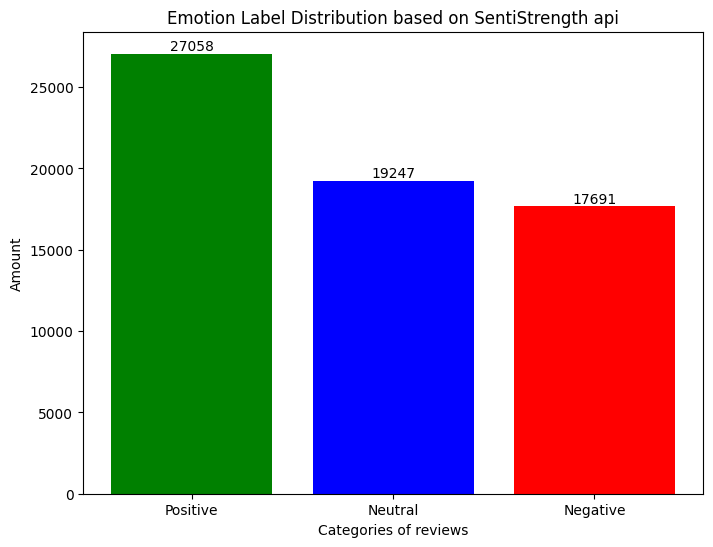

In [15]:
draw_distribution(reviews_with_api_scores)  # draw the bar chart to describe emotion label distribution based on SentiStrength api

### Selected 8000 reviews randomly.

In [16]:
reviews = reviews_with_api_scores.sample(n=8000, random_state=992)  # 992

In [17]:
view_data(reviews)

The shape of data:  (8000, 8)
The first 20 rows: 
                                                  content  score  length  \
63864  ver 12.14.1, delete all data menu not function...      3      23   
37176  used to be good. too many pop ups, ads article...      1      13   
40583  i couldn't even sign up i contacted fliphelp n...      1      12   
18714  for what i know about this app and it works re...      5      19   
47785  love the app, though on occasions what is play...      2      95   
55017  one of the best ways to store your pictures an...      5      21   
32254  x formally twitter is a good place to chat abo...      4      25   
33092  i miss twitter not this thing x com sounds sle...      1      15   
51699  this application is organized for only showing...      1      23   
4886   everything is good but whatapp please update y...      4       9   
20960      very useful and having so many good features.      5       8   
2210   i enabled two factor authentication in fac

In [18]:
simple_warning_check(reviews)  # the warning ratio of the selected reviews

warning amount: 3584
data amount: 8000
The warning ratio was: 0.448


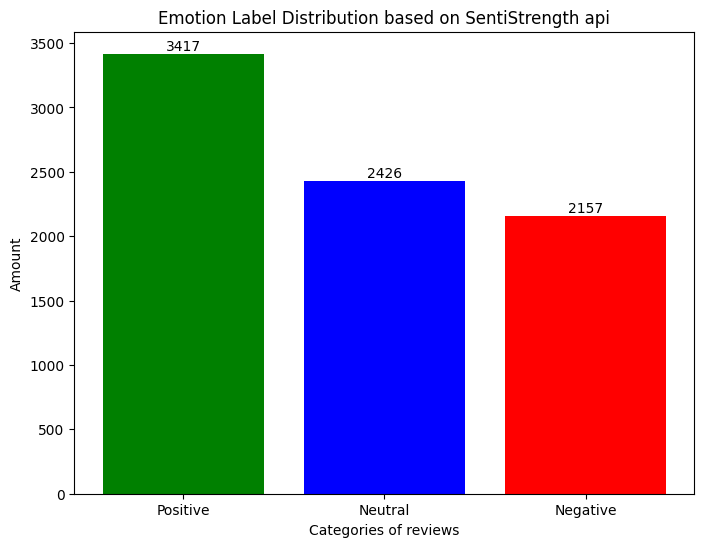

In [19]:
draw_distribution(reviews)  # the emotion label distribution based on SentiStrength api for these selected reviews

In [20]:
reviews.drop(["score", "google_label", "warn"], axis=1, inplace=True)  # drop useless columns after specific statistical operations
reviews.index.name = "manual_index"  # reset the index to prepare for manually checking

# Convert this processed data into the xlsx file for convenient comparison and analysis of various advanced preprocessing operations.
reviews.to_excel("./data/manual_check_data.xlsx", index = True, sheet_name = "original")  # need "pip install openpy" command in the terminal

### Was the previous situation of warning rates a coincidence? 
### Would the ratio change significantly in different time periods? 
### Whether the judgment of SentiStrength api was reliable and referential?

In [21]:
# MOST SAME OPERATIONS AS BEFORE; however, the data was changed.
data_path_2 = "./data/kaggle_data_1020.csv"  # Note: this dataset was published on October 20th, 2023.
raw_data_2 = pd.read_csv(data_path_2, encoding = "utf-8")
raw_data_2.drop(["reviewId", "app"], axis=1, inplace=True)

check_NaN(raw_data_2)
raw_data_2.drop_duplicates(subset = ["content"], keep = "first", inplace = True)

raw_data_2["content"] = raw_data_2["content"].astype(str).apply(turn_emoji_into_word)  
raw_data_2["content"] = raw_data_2["content"].apply(remove_useless_char)
raw_data_2["content"] = raw_data_2["content"].str.lower()
raw_data_2 = raw_data_2[~(raw_data_2["content"].str.isspace() | (raw_data_2["content"] == ""))]

check_NaN(raw_data_2)

minimum_length = 8
raw_data_2["length"] = raw_data_2["content"].str.split(r'\s+').apply(len)
raw_data_2 = raw_data_2[(raw_data_2["length"] >= minimum_length)]

tqdm.pandas()
english_check_2 = raw_data_2["content"].progress_apply(is_english)  # M1 pro 

data_english_2 = raw_data_2[english_check_2]

api_scores_2 = pd.DataFrame(pysenti.get_senti_list(data_english_2["content"]))  
api_scores_2.drop(columns=["neutral"], inplace = True)

data_english_reset_2 = data_english_2.reset_index(drop=True)
api_scores_reset_2 = api_scores_2.reset_index(drop=True)

reviews_with_api_scores_2 = pd.concat([data_english_reset_2, api_scores_reset_2], axis = 1)

reviews_with_api_scores_2["emotion_label"] = reviews_with_api_scores_2.apply(lambda row: "positive" if abs(row["positive"]) > abs(row["negative"])
                                else ("negative" if abs(row["negative"]) > abs(row["positive"])
                                else "neutral"), axis=1)  

reviews_with_api_scores_2["google_label"] = reviews_with_api_scores_2["score"].apply(lambda x: "negative" if x in [1, 2] else (
                                                                             "neutral" if x == 3 else (
                                                                             "positive" if x in [4, 5] else None)))

reviews_with_api_scores_2["warn"] = reviews_with_api_scores_2.apply(
                    lambda row: "warning" if row["emotion_label"] != row["google_label"] else " ", axis=1)

simple_warning_check(reviews_with_api_scores_2)

Checking NaN......
The NaN rows: 
       content  score
11593      NaN      5
16445      NaN      4
21282      NaN      5
23635      NaN      5
25468      NaN      5
25683      NaN      5
83066      NaN      4
103850     NaN      5
105642     NaN      3
108491     NaN      3
115799     NaN      3
116986     NaN      5
122201     NaN      5
128968     NaN      1
129914     NaN      5
130683     NaN      4
131870     NaN      4
136606     NaN      1
137339     NaN      1
141455     NaN      1
152944     NaN      5
154692     NaN      5
182145     NaN      5
183579     NaN      5
185936     NaN      5
191203     NaN      5
193253     NaN      2
193736     NaN      5

The number of rows with NaN: 28
Deleting......
These rows with NaN had been removed!
Checking NaN......
No NaN data detected


100%|████████████████████████████████████| 67950/67950 [02:12<00:00, 513.89it/s]


warning amount: 28305
data amount: 64554
The warning ratio was: 0.4384701180407101


In [22]:
# MOST SAME OPERATIONS AS BEFORE; however, the data was changed. 
data_path_3 = "./data/kaggle_data_1214.csv"  # Note: this dataset was published on December 14th, 2023.
raw_data_3 = pd.read_csv(data_path_3, encoding = "utf-8")
raw_data_3.drop(["reviewId", "app"], axis=1, inplace=True)

check_NaN(raw_data_3)
raw_data_3.drop_duplicates(subset = ["content"], keep = "first", inplace = True)

raw_data_3["content"] = raw_data_3["content"].astype(str).apply(turn_emoji_into_word)  
raw_data_3["content"] = raw_data_3["content"].apply(remove_useless_char)
raw_data_3["content"] = raw_data_3["content"].str.lower()
raw_data_3 = raw_data_3[~(raw_data_3["content"].str.isspace() | (raw_data_3["content"] == ""))]

check_NaN(raw_data_3)

minimum_length = 8
raw_data_3["length"] = raw_data_3["content"].str.split(r'\s+').apply(len)
raw_data_3 = raw_data_3[(raw_data_3["length"] >= minimum_length)]

tqdm.pandas()
english_check_3 = raw_data_3["content"].progress_apply(is_english)  # M1 pro 

data_english_3 = raw_data_3[english_check_3]

api_scores_3 = pd.DataFrame(pysenti.get_senti_list(data_english_3["content"]))
api_scores_3.drop(columns=["neutral"], inplace = True)

data_english_reset_3 = data_english_3.reset_index(drop=True)
api_scores_reset_3 = api_scores_3.reset_index(drop=True)

reviews_with_api_scores_3 = pd.concat([data_english_reset_3, api_scores_reset_3], axis = 1)

reviews_with_api_scores_3["emotion_label"] = reviews_with_api_scores_3.apply(lambda row: "positive" if abs(row["positive"]) > abs(row["negative"])
                                else ("negative" if abs(row["negative"]) > abs(row["positive"])
                                else "neutral"), axis=1)

reviews_with_api_scores_3["google_label"] = reviews_with_api_scores_3["score"].apply(lambda x: "negative" if x in [1, 2] else (
                                                                             "neutral" if x == 3 else (
                                                                             "positive" if x in [4, 5] else None)))

reviews_with_api_scores_3["warn"] = reviews_with_api_scores_3.apply(
                    lambda row: "warning" if row["emotion_label"] != row["google_label"] else " ", axis=1)

simple_warning_check(reviews_with_api_scores_3)

Checking NaN......
The NaN rows: 
       content  score
872        NaN      1
11024      NaN      2
11119      NaN      5
17788      NaN      2
20464      NaN      1
22708      NaN      5
23045      NaN      4
27303      NaN      1
28164      NaN      5
34646      NaN      5
48391      NaN      1
55826      NaN      5
62074      NaN      5
66313      NaN      5
72697      NaN      4
84808      NaN      4
106731     NaN      5
108507     NaN      3
112774     NaN      5
113762     NaN      5
115087     NaN      1
130840     NaN      4
131999     NaN      4
136592     NaN      1
137317     NaN      1
140205     NaN      3
142272     NaN      5
154005     NaN      5
155731     NaN      5
180900     NaN      5
186560     NaN      5
187967     NaN      5
192313     NaN      5
194314     NaN      2
194785     NaN      5

The number of rows with NaN: 35
Deleting......
These rows with NaN had been removed!
Checking NaN......
No NaN data detected


100%|████████████████████████████████████| 65957/65957 [02:08<00:00, 512.80it/s]


warning amount: 27271
data amount: 62717
The warning ratio was: 0.43482628314492083
